In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
import gym
from gym import spaces
import random
from collections import deque, defaultdict

In [3]:
from glob import glob

In [4]:
import pickle

In [5]:
# Load the dataset
file_path1 = glob(f"./day*.csv")
file_path2 = glob(f"./poison*.csv")

In [6]:
file_path2[0][18:]

''

In [7]:
file_path1 = sorted(file_path1, key=lambda x: int(x[5:].split('.')[0]))

In [8]:
file_path1

['./day8.csv',
 './day9.csv',
 './day10.csv',
 './day11.csv',
 './day12.csv',
 './day13.csv',
 './day14.csv']

In [9]:
file_path2 = sorted(file_path2, key=lambda x: int(x[8:].split('.')[0]))
file_path2

['./poison8.csv',
 './poison9.csv',
 './poison10.csv',
 './poison11.csv',
 './poison12.csv',
 './poison13.csv',
 './poison14.csv']

In [10]:
data1 = [pd.read_csv(x) for x in file_path1]
data2 = [pd.read_csv(x) for x in file_path2]

In [11]:
def preprocess_data(df):
    # Convert 'Weapon Detected' to binary (1 for 'Yes', 0 for 'No')
    #df['Weapon Detected'] = df['Weapon Detected'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Encode 'Timestamp' using LabelEncoder
    label_encoder = LabelEncoder()
    df['Hour'] = label_encoder.fit_transform(df['Hour'])
    
    week_label = LabelEncoder()
    df['Weekday/Weekend'] = week_label.fit_transform(df['Weekday/Weekend'])

    # Extract state and action data
    state_data = df[['Hour', 'Presence Detector', 'Face Recognition', 'Weapon Recognition']].values
    actions = df['Action'].values
    
    return state_data, actions

In [12]:
# Preprocess the dataset
#state_data_N, actions_N = preprocess_data(data1)
state_data_N = []
actions_N = []
for d in data1:
    a, b = preprocess_data(d)
    state_data_N.append(a)
    actions_N.append(b)
    

In [13]:
state_data_N

[array([[  0,   0,   0,   0],
        [  1,   0,   0,   0],
        [  2,   0,   0,   0],
        [  3,   0,   0,   0],
        [  4,   0,   0,   0],
        [  5,   0,   0,   0],
        [  6,   0,   0,   0],
        [  7,   0,   0,   0],
        [  8,   0,   0,   0],
        [  9,   0,   0,   0],
        [ 10,   0,   0,   0],
        [ 11,   0,   0,   0],
        [ 12,   0,   0,   0],
        [ 13,   0,   0,   0],
        [ 14,   0,   0,   0],
        [ 15,   0,   0,   0],
        [ 16,   0,   0,   0],
        [ 17,   0,   0,   0],
        [ 18,   0,   0,   0],
        [ 19,   0,   0,   0],
        [ 20,   0,   0,   0],
        [ 21,   0,   0,   0],
        [ 22,   0,   0,   0],
        [ 23,   0,   0,   0],
        [ 24,   0,   0,   0],
        [ 25,   0,   0,   0],
        [ 26,   0,   0,   0],
        [ 27,   0,   0,   0],
        [ 28,   0,   0,   0],
        [ 29,   0,   0,   0],
        [ 30,   0,   0,   0],
        [ 31,   0,   0,   0],
        [ 32,   0,   0,   0],
        [ 

In [14]:
len(state_data_N[6])

144

In [15]:
len(state_data_N)

7

In [16]:
actions_N

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 

In [17]:
# Preprocess the dataset
#state_data_P, actions_P = preprocess_data(data2)
state_data_P = []
actions_P = []
for d in data2:
    a, b = preprocess_data(d)
    state_data_P.append(a)
    actions_P.append(b)
    

In [18]:
state_data_P

[array([[  0,   0,   0,   0],
        [  1,   0,   0,   0],
        [  2,   0,   0,   0],
        [  3,   0,   0,   0],
        [  4,   0,   0,   0],
        [  5,   0,   0,   0],
        [  6,   0,   0,   0],
        [  7,   0,   0,   0],
        [  8,   0,   0,   0],
        [  9,   0,   0,   0],
        [ 10,   0,   0,   0],
        [ 11,   0,   0,   0],
        [ 12,   0,   0,   0],
        [ 13,   0,   0,   0],
        [ 14,   0,   0,   0],
        [ 15,   0,   0,   0],
        [ 16,   0,   0,   0],
        [ 17,   0,   0,   0],
        [ 18,   0,   0,   0],
        [ 19,   0,   0,   0],
        [ 20,   0,   0,   0],
        [ 21,   0,   0,   0],
        [ 22,   0,   0,   0],
        [ 23,   0,   0,   0],
        [ 24,   0,   0,   0],
        [ 25,   0,   0,   0],
        [ 26,   0,   0,   0],
        [ 27,   0,   0,   0],
        [ 28,   0,   0,   0],
        [ 29,   0,   0,   0],
        [ 30,   0,   0,   0],
        [ 31,   0,   0,   0],
        [ 32,   0,   0,   0],
        [ 

In [19]:
#np.zeros(state_data_N[0].shape[1])

In [20]:
class RealTimeEnvironment(gym.Env):
    def __init__(self, state_data_N, actions_N, state_data_P, actions_P):
        super(RealTimeEnvironment, self).__init__()
        self.state_data_N = state_data_N
        self.actions_data_N = actions_N
        self.state_data_P = state_data_P
        self.actions_data_P = actions_P
        self.current_step = 0
        self.correct = []
        self.index = 0

        # Define observation space (4 features: Timestamp, Presence Sensor, Persons Recognized, Weapon Detected)
        self.observation_space = spaces.Box(low=0, high=1, shape=(4,), dtype=np.float32)
        
        # Action space: 2 actions (0: do nothing, 2: inform owner and police)
        self.action_space = spaces.Discrete(2)
        
    def reset_N(self):
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        #print(f"self.index = {self.index}")
        return self.state_data_N[self.index][self.current_step]
    
    def reset_P(self):
        self.current_step = 0
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        return self.state_data_P[self.index][self.current_step]

    def step_N(self, action):
        correct_action = int(self.actions_data_N[self.index][self.current_step])
        #print(f"Action: {action} --- Gabarito: {correct_action}")
        self.correct.append(correct_action)
        #reward = 1 if action == correct_action else -1
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            reward = -1
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_N[self.index])
        
        # Get the next state
        if not done:
            next_state = self.state_data_N[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            if self.index <= 6:
                self.index += 1
            else:
                self.index = 0
            #next_state = self.state_data_N[self.index][0]
        return next_state, reward, done, {}
    
    def step_P(self, action):
        #correct_action = int(self.actions_data_P[self.index][self.current_step])
        correct_action = int(self.actions_data_N[self.index][self.current_step])
        self.correct.append(correct_action)
        
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            reward = -1
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_P[self.index])
        
        # Get the next state
        if not done: 
            next_state = self.state_data_P[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            #next_state = np.zeros(self.state_data_P.shape[1])
            
        
        return next_state, reward, done, {}
    
    def render_N(self):
        print(f"Step: {self.current_step}, State: {self.state_data_N[self.current_step]}")
        
    def render_P(self):
        print(f"Step: {self.current_step}, State: {self.state_data_P[self.current_step]}")

In [21]:
# Initialize the environment
env = RealTimeEnvironment(state_data_N, actions_N, state_data_P, actions_P)

In [22]:
env.index

0

In [23]:
# Initialize Q-table using a defaultdict for easy default values
#q_table = defaultdict(lambda: [0, 0])  # Two actions, initialized to zero

In [24]:
with open("q_table_2.pkl", "rb") as f:
    q_table = pickle.load(f)

In [25]:
# Reconvertendo para defaultdict
q_table = defaultdict(lambda: [0, 0], q_table)

In [26]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(9, 0, 0, 0): [56.70143289374285, 24.72401338405915],
             (0, 0, 0, 0): [55.97975682649808, 22.334447550494374],
             (19, 0, 0, 0): [57.45212742335067, 22.814104524974326],
             (29, 0, 0, 0): [58.216318746060956, 26.482750113032356],
             (39, 0, 0, 0): [58.921358838671466, 24.646325947808705],
             (49, 0, 0, 0): [59.86533246962034, 23.675944467558843],
             (59, 0, 0, 0): [60.72879352126764, 20.162332703567063],
             (69, 0, 0, 0): [61.62635625426444, 21.956683977019956],
             (79, 0, 0, 0): [62.56348646741791, 19.816547081736182],
             (89, 0, 0, 0): [63.541187719548596, 24.134560766651614],
             (99, 0, 0, 0): [64.55115518594923, 29.75123988913594],
             (109, 0, 0, 0): [65.585244476879, 30.08183996362704],
             (119, 0, 0, 0): [66.64892781387861, 25.075793822919003],
             (129, 0, 0, 0): [67.75335755044327, 19.062395708

In [27]:
#q_table = dict(sorted(q_table.items()))

In [28]:
#q_table

In [29]:
# Helper function to discretize continuous states
def discretize_state(state):
    """Convert continuous state into a discrete tuple."""
    return tuple(int(state[i] // (1 / state_discretizer[i])) for i in range(len(state)))

In [30]:
state_discretizer = (10, 2, 2, 2)

In [31]:
state = env.reset_N()  # Ou `env.reset_P()` dependendo do cenário
state = discretize_state(state)
done = False
env.index = 0
# Metrics for tracking performance
reward_history = deque(maxlen=2016)
action_accuracy = deque(maxlen=2016)

In [32]:
env.index

0

In [33]:
poison = True
avg_reward = []
suc_rate = []
epsilon = []
index = 0
episode = 0
episode_reward = 0
while True:
    
    #print(f"Episode reward : {episode_reward}")
    # Escolher a melhor ação (exploração)
    action = np.argmax(q_table[tuple(state)])
    
    # Realizar a ação no ambiente
    next_state, reward, done, _ = env.step_N(action) if poison == False else env.step_P(action)  # Use step_P para outro cenário
    next_state = discretize_state(next_state)

    #print(f"Estado: {state}, Ação: {action}, Recompensa: {reward}")
    state = next_state
    episode_reward += reward
    #action_accuracy.append(1 if reward == 1 else 0)  # Track if action was correct
    action_accuracy.append(1 if reward > 0 else 0)  # Track if action was correct 
    
    
    #print(index)
    
    if index % 143 == 0 and index != 0:
        
        reward_history.append(episode_reward)
        average_reward = np.mean(reward_history)
        success_rate = np.mean(action_accuracy)
        avg_reward.append(average_reward)
        suc_rate.append(success_rate)
        print(f"Episode {episode}: Avg Reward = {average_reward:.2f}, Success Rate = {success_rate:.2f}")
        episode += 1
        state = env.reset_N() if poison == False else env.reset_P()
        episode_reward = 0
        
    if episode == 1000:
        break 
    
    index += 1   

Episode 0: Avg Reward = 138.00, Success Rate = 0.98
Episode 1: Avg Reward = 137.50, Success Rate = 0.98
Episode 2: Avg Reward = 137.33, Success Rate = 0.98
Episode 3: Avg Reward = 132.25, Success Rate = 0.96
Episode 4: Avg Reward = 131.60, Success Rate = 0.96
Episode 5: Avg Reward = 128.50, Success Rate = 0.95
Episode 6: Avg Reward = 122.43, Success Rate = 0.92
Episode 7: Avg Reward = 124.25, Success Rate = 0.93
Episode 8: Avg Reward = 125.67, Success Rate = 0.93
Episode 9: Avg Reward = 126.80, Success Rate = 0.94
Episode 10: Avg Reward = 125.91, Success Rate = 0.93
Episode 11: Avg Reward = 126.17, Success Rate = 0.94
Episode 12: Avg Reward = 125.15, Success Rate = 0.93
Episode 13: Avg Reward = 122.36, Success Rate = 0.92
Episode 14: Avg Reward = 123.33, Success Rate = 0.92
Episode 15: Avg Reward = 124.19, Success Rate = 0.92
Episode 16: Avg Reward = 124.94, Success Rate = 0.92
Episode 17: Avg Reward = 124.50, Success Rate = 0.92
Episode 18: Avg Reward = 124.74, Success Rate = 0.92
Epi

Episode 500: Avg Reward = 122.37, Success Rate = 0.92
Episode 501: Avg Reward = 122.38, Success Rate = 0.92
Episode 502: Avg Reward = 122.36, Success Rate = 0.92
Episode 503: Avg Reward = 122.29, Success Rate = 0.92
Episode 504: Avg Reward = 122.32, Success Rate = 0.92
Episode 505: Avg Reward = 122.35, Success Rate = 0.92
Episode 506: Avg Reward = 122.37, Success Rate = 0.92
Episode 507: Avg Reward = 122.36, Success Rate = 0.92
Episode 508: Avg Reward = 122.38, Success Rate = 0.92
Episode 509: Avg Reward = 122.36, Success Rate = 0.92
Episode 510: Avg Reward = 122.29, Success Rate = 0.92
Episode 511: Avg Reward = 122.32, Success Rate = 0.92
Episode 512: Avg Reward = 122.35, Success Rate = 0.92
Episode 513: Avg Reward = 122.37, Success Rate = 0.92
Episode 514: Avg Reward = 122.36, Success Rate = 0.92
Episode 515: Avg Reward = 122.38, Success Rate = 0.92
Episode 516: Avg Reward = 122.36, Success Rate = 0.92
Episode 517: Avg Reward = 122.29, Success Rate = 0.92
Episode 518: Avg Reward = 12

Episode 654: Avg Reward = 122.35, Success Rate = 0.92
Episode 655: Avg Reward = 122.36, Success Rate = 0.92
Episode 656: Avg Reward = 122.34, Success Rate = 0.92
Episode 657: Avg Reward = 122.29, Success Rate = 0.92
Episode 658: Avg Reward = 122.31, Success Rate = 0.92
Episode 659: Avg Reward = 122.33, Success Rate = 0.92
Episode 660: Avg Reward = 122.35, Success Rate = 0.92
Episode 661: Avg Reward = 122.35, Success Rate = 0.92
Episode 662: Avg Reward = 122.36, Success Rate = 0.92
Episode 663: Avg Reward = 122.34, Success Rate = 0.92
Episode 664: Avg Reward = 122.29, Success Rate = 0.92
Episode 665: Avg Reward = 122.31, Success Rate = 0.92
Episode 666: Avg Reward = 122.33, Success Rate = 0.92
Episode 667: Avg Reward = 122.35, Success Rate = 0.92
Episode 668: Avg Reward = 122.35, Success Rate = 0.92
Episode 669: Avg Reward = 122.36, Success Rate = 0.92
Episode 670: Avg Reward = 122.34, Success Rate = 0.92
Episode 671: Avg Reward = 122.29, Success Rate = 0.92
Episode 672: Avg Reward = 12

Episode 858: Avg Reward = 122.34, Success Rate = 0.92
Episode 859: Avg Reward = 122.33, Success Rate = 0.92
Episode 860: Avg Reward = 122.29, Success Rate = 0.92
Episode 861: Avg Reward = 122.30, Success Rate = 0.92
Episode 862: Avg Reward = 122.32, Success Rate = 0.92
Episode 863: Avg Reward = 122.34, Success Rate = 0.92
Episode 864: Avg Reward = 122.33, Success Rate = 0.92
Episode 865: Avg Reward = 122.34, Success Rate = 0.92
Episode 866: Avg Reward = 122.33, Success Rate = 0.92
Episode 867: Avg Reward = 122.29, Success Rate = 0.92
Episode 868: Avg Reward = 122.30, Success Rate = 0.92
Episode 869: Avg Reward = 122.32, Success Rate = 0.92
Episode 870: Avg Reward = 122.34, Success Rate = 0.92
Episode 871: Avg Reward = 122.33, Success Rate = 0.92
Episode 872: Avg Reward = 122.34, Success Rate = 0.92
Episode 873: Avg Reward = 122.33, Success Rate = 0.92
Episode 874: Avg Reward = 122.29, Success Rate = 0.92
Episode 875: Avg Reward = 122.30, Success Rate = 0.92
Episode 876: Avg Reward = 12

In [34]:
import matplotlib.pyplot as plt

In [35]:
episodes = [x for x in range(0,1000,20)]

In [36]:
avg = [x for x in avg_reward[::20]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


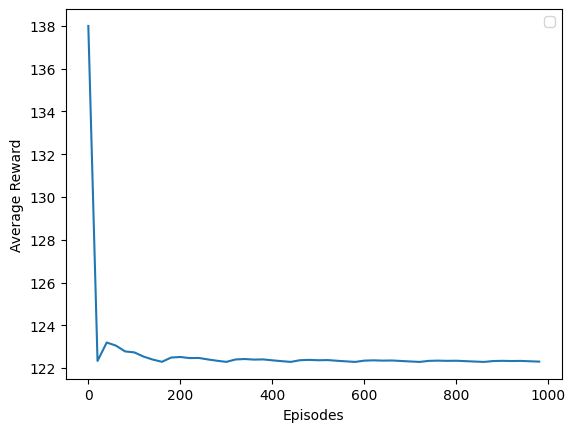

In [37]:
plt.plot(episodes,avg)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.legend()
plt.savefig("Avg_poison_2.png")

In [38]:
suc = [x for x in suc_rate[::20]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


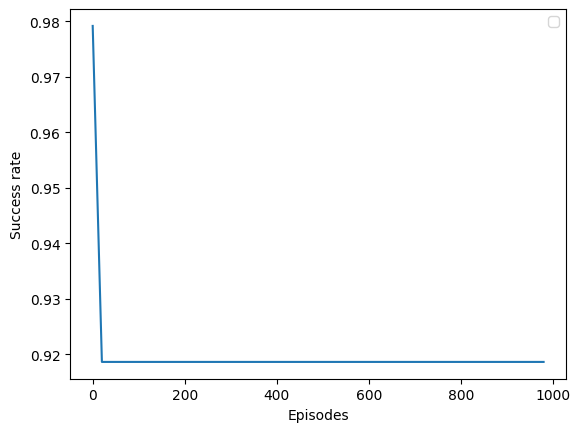

In [39]:
plt.plot(episodes,suc)
plt.xlabel('Episodes')
plt.ylabel('Success rate')
plt.legend()
plt.savefig("suc_poison_2.png")

In [40]:
len(epsilon)

0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


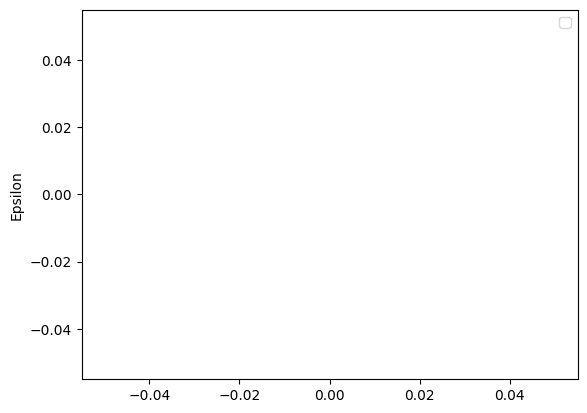

In [41]:
plt.plot(epsilon[500:900])
#plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.legend()
#plt.savefig("epsilon_normal.png")

In [42]:
epsilon[500:600]

[]

In [43]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(9, 0, 0, 0): [56.70143289374285, 24.72401338405915],
             (0, 0, 0, 0): [55.97975682649808, 22.334447550494374],
             (19, 0, 0, 0): [57.45212742335067, 22.814104524974326],
             (29, 0, 0, 0): [58.216318746060956, 26.482750113032356],
             (39, 0, 0, 0): [58.921358838671466, 24.646325947808705],
             (49, 0, 0, 0): [59.86533246962034, 23.675944467558843],
             (59, 0, 0, 0): [60.72879352126764, 20.162332703567063],
             (69, 0, 0, 0): [61.62635625426444, 21.956683977019956],
             (79, 0, 0, 0): [62.56348646741791, 19.816547081736182],
             (89, 0, 0, 0): [63.541187719548596, 24.134560766651614],
             (99, 0, 0, 0): [64.55115518594923, 29.75123988913594],
             (109, 0, 0, 0): [65.585244476879, 30.08183996362704],
             (119, 0, 0, 0): [66.64892781387861, 25.075793822919003],
             (129, 0, 0, 0): [67.75335755044327, 19.062395708